In [4]:
pip install spacy

     ---------------------------------------- 11.9/11.9 MB 6.5 MB/s eta 0:00:00
     ---------------------------------------- 1.3/1.3 MB 9.0 MB/s eta 0:00:00
     ---------------------------------------- 48.9/48.9 kB 2.4 MB/s eta 0:00:00
     ------------------------------------- 181.6/181.6 kB 10.7 MB/s eta 0:00:00
     -------------------------------------- 481.4/481.4 kB 6.0 MB/s eta 0:00:00
     ---------------------------------------- 56.8/56.8 kB 3.1 MB/s eta 0:00:00
     ---------------------------------------- 96.8/96.8 kB 5.4 MB/s eta 0:00:00
     ---------------------------------------- 2.1/2.1 MB 10.4 MB/s eta 0:00:00
     ---------------------------------------- 7.0/7.0 MB 11.0 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.1.1
    Uninstalling typing_extensions-4.1.1:
      Successfully uninstalled typing_extensions-4.1.1
  Attempting uninstall: smart-open
    Found existing installation: smart-open 5.1.0
   

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.6.0 requires absl-py~=0.10, but you have absl-py 1.3.0 which is incompatible.
tensorflow 2.6.0 requires h5py~=3.1.0, but you have h5py 3.7.0 which is incompatible.
tensorflow 2.6.0 requires six~=1.15.0, but you have six 1.16.0 which is incompatible.
tensorflow 2.6.0 requires typing-extensions~=3.7.4, but you have typing-extensions 4.4.0 which is incompatible.


In [1]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [62]:
pip install -U textblob

Note: you may need to restart the kernel to use updated packages.


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import spacy
from matplotlib.pyplot import imread
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

In [6]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rajiv\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rajiv\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rajiv\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
tweet=pd.read_csv("Elon_musk.csv", encoding="latin-1")

In [8]:
tweet.head()

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [9]:
tweet.shape

(1999, 2)

In [10]:
tweet.drop(['Unnamed: 0'],inplace=True,axis=1)

In [11]:
tweet

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [12]:
tweet

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [13]:
import re
def cleanTxt(text):
    text = re.sub('@[A-za-z0-9_]*','', text)  # remove @mentions
    text = re.sub('#','',text)                # remove '#' symbol
    text = re.sub('https?:\/\/\S+', '', text) # remove hyper link
    text = re.sub('<[A-Z0-9a-z+-_]*>','', text)
    text = re.sub('[^A-Za-z0-9]',' ', text)
    
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub("[0-9" "]+"," ",text)
    text = re.sub('[‘’“”…]', '', text)
    return text

In [14]:
tweet['Text'] = tweet['Text'].apply(cleanTxt)
tweet

,Text
0,I m an alien
1,Ray tracing on Cyberpunk with HDR is next lev...
2,Great interview
3,Doge is underestimated
4,Congratulations Tesla China for amazing execu...
...,...
1994,True it sounds so surreal but the negative ...
1995,Make sure to read ur terms amp conditions b...
1996,Samwise Gamgee
1997,Altho Dumb and Dumber is


In [15]:
tweet['Text'] = tweet['Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
tweet['Text'].head()

0                                         i m an alien
1    ray tracing on cyberpunk with hdr is next leve...
2                                      great interview
3                               doge is underestimated
4    congratulations tesla china for amazing execut...
Name: Text, dtype: object

In [16]:
freq = pd.Series(' '.join(tweet['Text']).split()).value_counts()[:20] 
#counting word frequency of top 20 

In [17]:
freq

the     487
to      400
a       357
is      356
of      315
in      221
amp     219
it      194
for     194
s       173
we      172
will    165
be      157
that    149
this    140
i       137
on      129
rt      127
but     126
with    108
dtype: int64

In [18]:
pip install -U textblob

Note: you may need to restart the kernel to use updated packages.


In [19]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
tweet['Text'] = tweet['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
tweet

,Text
0,alien
1,ray tracing cyberpunk hdr next level tried
2,great interview
3,doge underestimated
4,congratulations tesla china amazing execution ...
...,...
1994,true sounds surreal negative propaganda still ...
1995,make sure read ur terms amp conditions clickin...
1996,samwise gamgee
1997,altho dumb dumber


In [20]:
freq_Sw= pd.Series(' '.join(tweet['Text']).split()).value_counts()[:20]
#After removing stopword top 20 frequentword

In [21]:
freq_Sw

amp         219
rt          127
tesla        97
yes          86
great        76
haha         55
good         51
launch       49
sure         43
would        41
yeah         41
much         40
dragon       39
first        39
like         39
one          39
spacex       37
true         35
probably     35
high         34
dtype: int64

In [22]:
freq = pd.Series(' '.join(tweet['Text']).split()).value_counts()[:10]
#removing the most frequent words

In [23]:
freq

amp       219
rt        127
tesla      97
yes        86
great      76
haha       55
good       51
launch     49
sure       43
would      41
dtype: int64

In [24]:
freq = list(freq.index)
tweet['Text'] = tweet['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
tweet['Text'].head()

0                                                alien
1           ray tracing cyberpunk hdr next level tried
2                                            interview
3                                  doge underestimated
4    congratulations china amazing execution last y...
Name: Text, dtype: object

In [25]:
freq = pd.Series(' '.join(tweet['Text']).split()).value_counts()[-10:]
freq

fever       1
elon        1
cam         1
musk        1
negati      1
carousel    1
typical     1
unusual     1
bogus       1
altho       1
dtype: int64

In [26]:
freq = list(freq.index)
tweet['Text'] = tweet['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
tweet['Text'].head()

0                                                alien
1           ray tracing cyberpunk hdr next level tried
2                                            interview
3                                  doge underestimated
4    congratulations china amazing execution last y...
Name: Text, dtype: object

In [27]:
#correcting the wrong spelled word

In [28]:
from textblob import TextBlob

In [29]:
tweet['Text'][:5].apply(lambda x: str(TextBlob(x).correct()))

0                                                alien
1           ray tracing cyberpunk her next level tried
2                                            interview
3                                  done underestimated
4    congratulations china amazing execution last y...
Name: Text, dtype: object

# Tokenization

In [30]:
TextBlob(tweet['Text'][1]).words

WordList(['ray', 'tracing', 'cyberpunk', 'hdr', 'next', 'level', 'tried'])

# Stemming

In [32]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
tweet['Text'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0                                              alien
1             ray trace cyberpunk hdr next level tri
2                                          interview
3                                    doge underestim
4    congratul china amaz execut last year next even
Name: Text, dtype: object

# Lemmatization

In [35]:
from textblob import Word

In [37]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\rajiv\AppData\Roaming\nltk_data...


True

In [39]:
tweet['Text'] = tweet['Text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
tweet['Text'].head()

0                                                alien
1           ray tracing cyberpunk hdr next level tried
2                                            interview
3                                  doge underestimated
4    congratulation china amazing execution last ye...
Name: Text, dtype: object

In [60]:
from sklearn.feature_extraction.text import CountVectorizer

using countvector to know the frequency of words

In [62]:
vectorizer = CountVectorizer(min_df = 1, max_df = 5)
X = vectorizer.fit_transform(tweet["Text"])
word_freq_df = pd.DataFrame({'term': vectorizer.get_feature_names(), 'occurrences':np.asarray(X.sum(axis=0)).ravel().tolist()})
word_freq_df['frequency'] = word_freq_df['occurrences']/np.sum(word_freq_df['occurrences'])

C:\Users\rajiv\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


N -gram

In [65]:
TextBlob(tweet['Text'][0]).ngrams(2)

[]

In [67]:
tf1 = (tweet['Text'][1:2]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf1.columns = ['words','tf']
tf1

,words,tf
0,ray,1
1,tracing,1
2,cyberpunk,1
3,hdr,1
4,next,1
5,level,1
6,tried,1


In [70]:
for i,word in enumerate(tf1['words']):
  tf1.loc[i, 'idf'] = np.log(tweet.shape[0]/(len(tweet[tweet['Text'].str.contains(word)])))

tf1

,words,tf,idf
0,ray,1,6.501790
1,tracing,1,7.600402
2,cyberpunk,1,5.990964
3,hdr,1,7.600402
4,next,1,4.233107
5,level,1,5.297817
6,tried,1,5.808643


In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word',
 stop_words= 'english',ngram_range=(1,1))
vect = tfidf.fit_transform(tweet['Text'])
vect

<1999x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 5781 stored elements in Compressed Sparse Row format>

In [73]:
from textblob import Word
from wordcloud import WordCloud

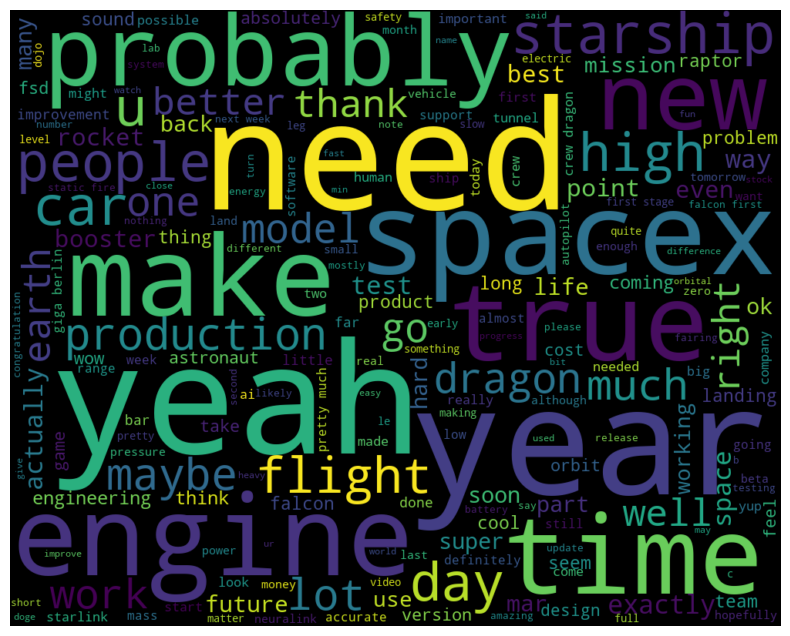

In [75]:
allwords = " ".join( [twts for twts in tweet["Text"]])
wordCloud = WordCloud(width =1000, height = 800, random_state= 21, max_font_size = 200).generate(allwords)

plt.figure( figsize = (10,8)) 
plt.imshow(wordCloud, interpolation= "bilinear")
plt.axis('off')
plt.show()

In [77]:
from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer(max_features=1000, lowercase=True, ngram_range=(1,1),analyzer = "word")
data_bow = bow.fit_transform(tweet['Text'])
data_bow

<1999x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 6456 stored elements in Compressed Sparse Row format>

Sentiment analysis

In [78]:
tweet['Text'][:5].apply(lambda x: TextBlob(x).sentiment)

0                                 (-0.25, 0.75)
1                                    (0.0, 0.0)
2                                    (0.0, 0.0)
3                                    (0.0, 0.0)
4    (0.20000000000000004, 0.32222222222222224)
Name: Text, dtype: object

In [79]:
tweet['sentiment'] = tweet['Text'].apply(lambda x: TextBlob(x).sentiment[0] )
tweet[['Text','sentiment']].head()

,Text,sentiment
0,alien,-0.25
1,ray tracing cyberpunk hdr next level tried,0.00
2,interview,0.00
3,doge underestimated,0.00
4,congratulation china amazing execution last ye...,0.20


# performing emotion mining

In [80]:
import codecs

In [82]:
with codecs.open("positive-words.txt", "r", encoding="utf-8") as p:
    pos = p.read()
    print(pos)

;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
; 
; Opinion Lexicon: Positive
;
; This file contains a list of POSITIVE opinion words (or sentiment words).
;
; This file and the papers can all be downloaded from 
;    http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html
;
; If you use this list, please cite one of the following two papers:
;
;   Minqing Hu and Bing Liu. "Mining and Summarizing Customer Reviews." 
;       Proceedings of the ACM SIGKDD International Conference on Knowledge 
;       Discovery and Data Mining (KDD-2004), Aug 22-25, 2004, Seattle, 
;       Washington, USA, 
;   Bing Liu, Minqing Hu and Junsheng Cheng. "Opinion Observer: Analyzing 
;       and Comparing Opinions on the Web." Proceedings of the 14th 
;       International World Wide Web conference (WWW-2005), May 10-14, 
;       2005, Chiba, Japan.
;
; Notes: 
;    1. The appearance of an opinion word in a sentence does not necessarily  
;       mean that the sentence expresse

In [83]:
with codecs.open("negative-words.txt", "r", encoding="ISO-8859-1") as n:
    neg = n.read()
    print(neg)

;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
; 
; Opinion Lexicon: Negative
;
; This file contains a list of NEGATIVE opinion words (or sentiment words).
;
; This file and the papers can all be downloaded from 
;    http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html
;
; If you use this list, please cite one of the following two papers:
;
;   Minqing Hu and Bing Liu. "Mining and Summarizing Customer Reviews." 
;       Proceedings of the ACM SIGKDD International Conference on Knowledge 
;       Discovery and Data Mining (KDD-2004), Aug 22-25, 2004, Seattle, 
;       Washington, USA, 
;   Bing Liu, Minqing Hu and Junsheng Cheng. "Opinion Observer: Analyzing 
;       and Comparing Opinions on the Web." Proceedings of the 14th 
;       International World Wide Web conference (WWW-2005), May 10-14, 
;       2005, Chiba, Japan.
;
; Notes: 
;    1. The appearance of an opinion word in a sentence does not necessarily  
;       mean that the sentence expres

# ploting the sentiment value

In [87]:
tweet

,Text,sentiment
0,alien,-0.250000
1,ray tracing cyberpunk hdr next level tried,0.000000
2,interview,0.000000
3,doge underestimated,0.000000
4,congratulation china amazing execution last ye...,0.200000
...,...,...
1994,true sound surreal negative propaganda still e...,0.152381
1995,make read ur term condition clicking accept,0.000000
1996,samwise gamgee,0.000000
1997,dumb dumber,-0.375000


In [89]:
tweet.describe()

,sentiment
count,1999.000000
mean,0.078945
std,0.231537
min,-1.000000
25%,0.000000
50%,0.000000
75%,0.166667
max,1.000000


C:\Users\rajiv\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment', ylabel='Density'>

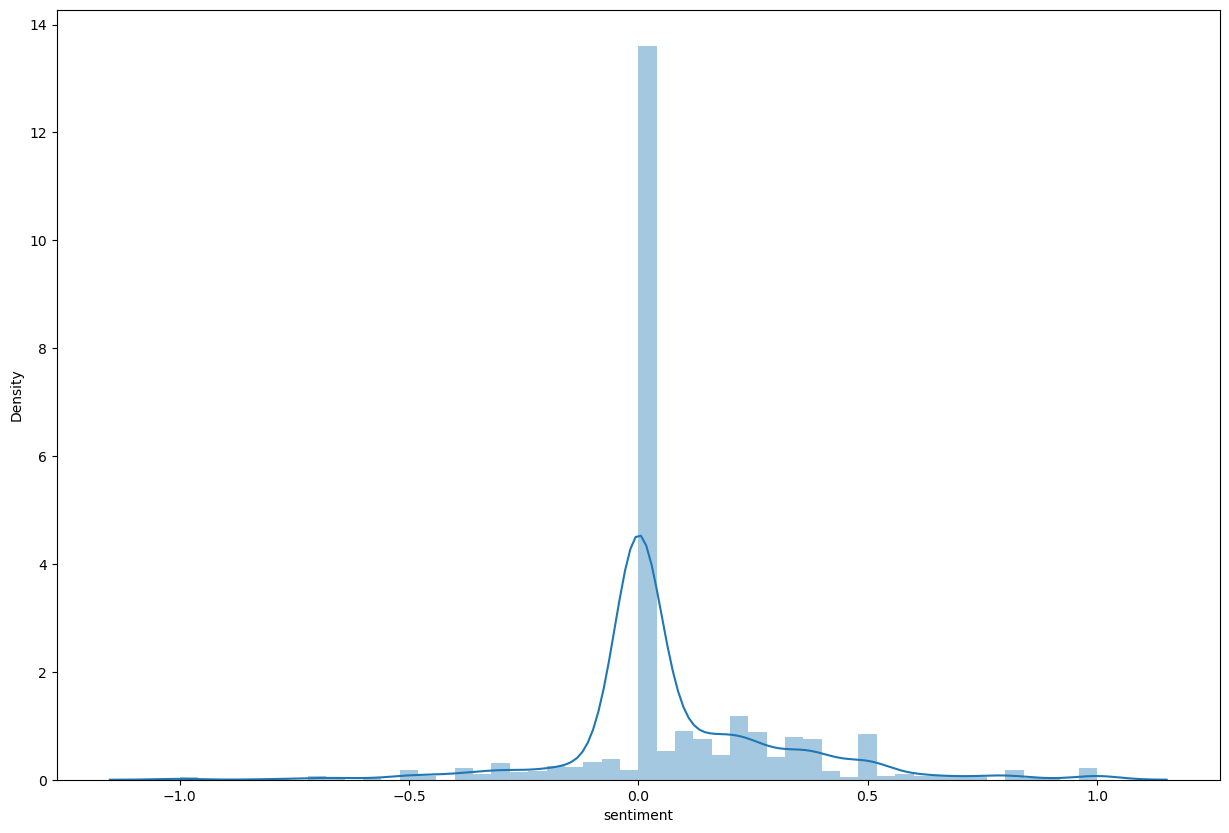

In [90]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(tweet['sentiment'])

In [93]:
tweet['index']=range(0,len(tweet))
tweet

,Text,sentiment,index
0,alien,-0.250000,0
1,ray tracing cyberpunk hdr next level tried,0.000000,1
2,interview,0.000000,2
3,doge underestimated,0.000000,3
4,congratulation china amazing execution last ye...,0.200000,4
...,...,...,...
1994,true sound surreal negative propaganda still e...,0.152381,1994
1995,make read ur term condition clicking accept,0.000000,1995
1996,samwise gamgee,0.000000,1996
1997,dumb dumber,-0.375000,1997


<AxesSubplot:xlabel='index', ylabel='sentiment'>

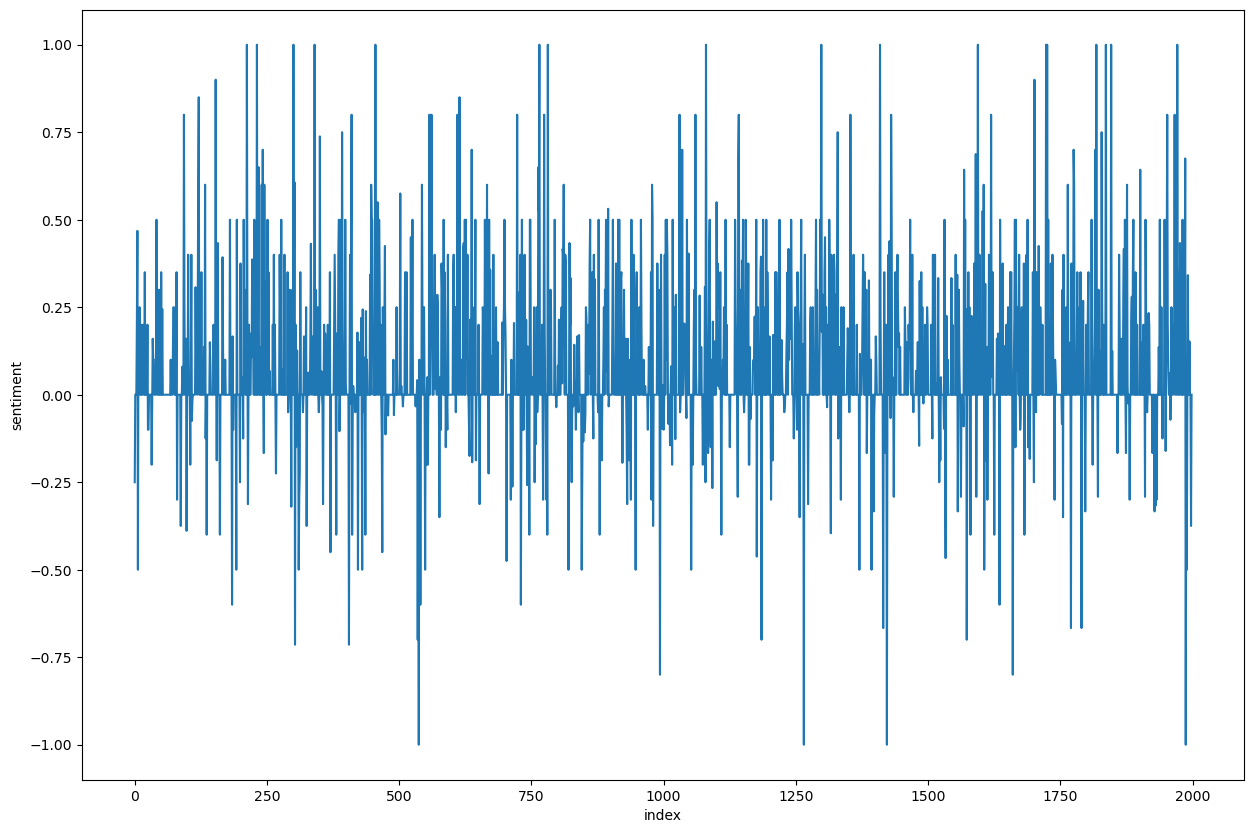

In [94]:
plt.figure(figsize=(15,10))
sns.lineplot(y='sentiment',x='index',data=tweet)